# Vertex coloring in networkX

This notebook is a short tutorial on how to implement vertex coloring, and do things with vertex coloring, in networkX. First of all load the usual boilerplate: 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt

## How vertex coloring works in networkX

The two things you need to know about real-world algorithms for vertex coloring are: 

1. **There is more than one way to do it**, and 
2. **There is currently no known efficient algorithm for finding a coloring of an arbitrary graph using the smallest possible number of colors**. 

Therefore, networkX does not have a magic command like `chromatic_number` or `smallest_coloring` or anything that, that finds an optimal (smallest) coloring. Instead, *networkX has a number of different built-in algorithms for coloring* and *not all of those colorings will use the same number of colors*. 

If you understand this, then we can then talk about the algorithms that networkX uses. 

Let's start by defining a graph on 8 vertices that is quite full (but not complete):

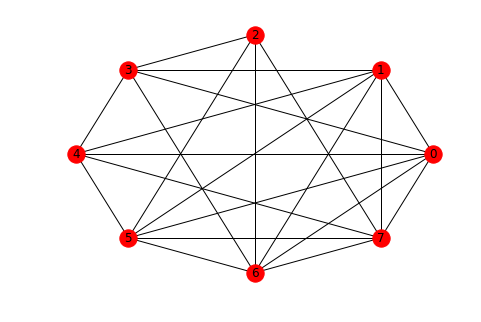

In [2]:
g = nx.Graph({0: [1, 3, 4, 5, 6, 7],
 1: [0, 3, 4, 5, 6, 7],
 2: [3, 5, 6, 7],
 3: [0, 1, 2, 4, 6],
 4: [0, 1, 3, 5, 7],
 5: [0, 1, 2, 4, 6, 7],
 6: [0, 1, 2, 3, 5, 7],
 7: [0, 1, 2, 4, 5, 6]})

nx.draw_circular(g, with_labels=True)
plt.show()

networkX has a library of coloring algorithms that can be accessed by entering `nx.coloring` and then adding a method from the library. The simplest is the algorithm known as `greedy_color`: 

In [3]:
nx.coloring.greedy_color(g)

{0: 0, 1: 1, 2: 0, 3: 2, 4: 3, 5: 2, 6: 3, 7: 4}

The output here is a dictionary in which the nodes are the keys, and the value for each key is its color class. For example, the output here assigns nodes 0 and 2 to the same color ("0"); node 1 to its own color ("1"); nodes 3 and 5 to the same color ("2"); nodes 4 and 6 to the same color ("3"); and finally node 7 to its own color ("4"). So the output of this command gives us a proper 5-coloring of the graph; you can think of the colors 0,1,2,3 and 4 as red, blue, green, yellow, and purple if you like. 

Giving the vertex coloring as a dictionary is the standard way that all networkX coloring algorithms work. We'll discuss converting this into an actual visual coloring of the grpah below.

This is called the "greedy" algorithm because it colors the vertices by first assigning a color to the node with the highest degree, then the next highest degree, and so on. There are variations on this algorithm available that you can specify: 

In [4]:
# This is the default greedy algorithm -- the strategy does not 
# actually need to be stated. 
nx.coloring.greedy_color(g, strategy=nx.coloring.strategy_largest_first)

{0: 0, 1: 1, 2: 0, 3: 2, 4: 3, 5: 2, 6: 3, 7: 4}

In [5]:
# This one randomly selects vertices one at a time and builds a 
# proper coloring. Notice the result is different here. 
nx.coloring.greedy_color(g, strategy=nx.coloring.strategy_random_sequential)

{0: 3, 1: 2, 2: 0, 3: 1, 4: 0, 5: 4, 6: 5, 7: 1}

In [6]:
nx.coloring.greedy_color(g, strategy=nx.coloring.strategy_connected_sequential)

{0: 0, 1: 1, 2: 0, 3: 2, 4: 3, 5: 2, 6: 3, 7: 4}

In [7]:
nx.coloring.greedy_color(g, strategy=nx.coloring.strategy_independent_set)

{0: 0, 1: 3, 2: 0, 3: 1, 4: 2, 5: 1, 6: 2, 7: 4}

In [8]:
nx.coloring.greedy_color(g, strategy=nx.coloring.strategy_smallest_last)

{0: 4, 1: 3, 2: 3, 3: 0, 4: 1, 5: 2, 6: 1, 7: 0}

The full list of strategies along with their explanations and source code can be found [here](https://networkx.github.io/documentation/development/_modules/networkx/algorithms/coloring/greedy_coloring.html).

Here is an example of why we need to be careful about the strategy we select, and why it's important to always try more than one. The complete bipartite graph $K_{4,4}$ is 2-colorable because all bipartite graphs are 2-colorable. The default strategy verifies this: 

In [9]:
k44 = nx.complete_bipartite_graph(4,4)
nx.coloring.greedy_color(k44)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1}

But if we switch strategies, we get a proper coloring, but it's not as small as possible: 

In [10]:
nx.coloring.greedy_color(g, strategy=nx.coloring.strategy_random_sequential)

{0: 4, 1: 1, 2: 1, 3: 0, 4: 3, 5: 0, 6: 3, 7: 2}

Each time this random algorithm is run, it produces a different coloring, sometimes using as many as four different colors, when 2 are sufficient! So, just because one strategy produces a certain number of colors, it doesn't mean we can't do better. Since there is no efficient algorithm for finding the smallest number of colors, it's important to look at the coloring through different lenses using different coloring strategies. 

## Actually coloring the nodes on a graph

The coloring produced by networkX is a dictionary that contains data about vertex colorings. We can use Python to take those data and map visual colors onto a graph.

Doing so requires more than a single line of code. The basic workflow is this: 

1. Specify the layout of the graph. 
2. For each of the color classes, draw those nodes separately using the `nx.draw_networkx_nodes` function and the color you want. 
3. Then draw the edges of the graph and (if you want) the node labels.
4. Then, because of the way matplotlib works, turn off the coordinate axes (they will appear by default otherwise). 
5. Then `plt.show()`. 

Here's an example using the 8-node graph from above: 

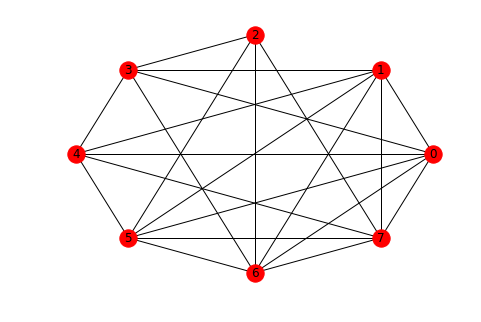

In [11]:
# First let's remind ourselves what the graph looked like

nx.draw_circular(g, with_labels=True)
plt.show()

In [12]:
# And the coloring: 

nx.coloring.greedy_color(g)

{0: 0, 1: 1, 2: 0, 3: 2, 4: 3, 5: 2, 6: 3, 7: 4}

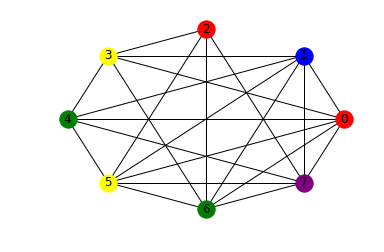

In [13]:
# The color classes are {0,2}, {1}, {3,5}, {4,6}, and {7}. 
# Here is some code that will assign those red, blue, yellow, green, and purple. 

# Specify the layout; in this case "circular" 
pos = nx.circular_layout(g)

# Now draw just the nodes, one color class at a time. 
# Here we have to specify the layout (`pos`) and the list of nodes. 
nx.draw_networkx_nodes(g, pos, nodelist=[0,2], node_color='red')
nx.draw_networkx_nodes(g, pos, nodelist=[1], node_color='blue')
nx.draw_networkx_nodes(g, pos, nodelist=[3,5], node_color='yellow')
nx.draw_networkx_nodes(g, pos, nodelist=[4,6], node_color='green')
nx.draw_networkx_nodes(g, pos, nodelist=[7], node_color='purple')

# Now draw the edges and labels: 
nx.draw_networkx_edges(g, pos)
nx.draw_networkx_labels(g, pos)

# Turn off the axes: 
plt.axis('off')

# Then plot the whole thing: 
plt.show()

Here's another example using $K_{4,4}$ and the standard coloring:

In [14]:
# In this coloring, nodes 0-3 are one color and 4-7 are another. 

k44 = nx.complete_bipartite_graph(4,4)
nx.coloring.greedy_color(k44)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1}

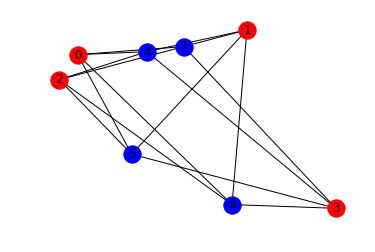

In [15]:
# Specify the layout; in this case with a "random" layout.
pos = nx.random_layout(k44)

# Now draw just the nodes, one color class at a time. 
# Here we have to specify the layout (`pos`) and the list of nodes. 
nx.draw_networkx_nodes(k44, pos, nodelist=[0,1,2,3], node_color='red')
nx.draw_networkx_nodes(k44, pos, nodelist=[4,5,6,7], node_color='blue')

# Now draw the edges and labels: 
nx.draw_networkx_edges(k44, pos)
nx.draw_networkx_labels(k44, pos)

# Turn off the axes: 
plt.axis('off')

# Then plot the whole thing: 
plt.show()